<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Relevant-Packages" data-toc-modified-id="Importing-Relevant-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Relevant Packages</a></span></li><li><span><a href="#Loading-and-Transforming-the-Data" data-toc-modified-id="Loading-and-Transforming-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and Transforming the Data</a></span></li><li><span><a href="#Removing-Surplus-Data" data-toc-modified-id="Removing-Surplus-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Removing Surplus Data</a></span></li><li><span><a href="#White-Noise" data-toc-modified-id="White-Noise-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>White Noise</a></span></li><li><span><a href="#Random-Walk" data-toc-modified-id="Random-Walk-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Random Walk</a></span></li><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Stationarity</a></span></li><li><span><a href="#Determining-Weak-Form-Stationarity" data-toc-modified-id="Determining-Weak-Form-Stationarity-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Determining Weak Form Stationarity</a></span></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Seasonality</a></span></li><li><span><a href="#Correlation-between-past-and-present-values" data-toc-modified-id="Correlation-between-past-and-present-values-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Correlation between past and present values</a></span></li><li><span><a href="#Autocorrelation-Function-(ACF)" data-toc-modified-id="Autocorrelation-Function-(ACF)-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Autocorrelation Function (ACF)</a></span></li><li><span><a href="#Partial-Autocorrelation-Function-(PACF)" data-toc-modified-id="Partial-Autocorrelation-Function-(PACF)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Partial Autocorrelation Function (PACF)</a></span></li></ul></div>

# Importing Relevant Packages

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Loading and Transforming the Data

In [3]:
raw_csv_data = pd.read_csv("datasets/Section_3_Introduction_to_time_series_in_python/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq("b")
df_comp = df_comp.fillna(method="ffill")
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Removing Surplus Data

In [4]:
df_comp['market_value'] = df_comp.spx

In [5]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

# White Noise

- It is a special type of time-series, where the data doesn't follow a pattern
- As no pattern is found, we cannot predict the future
- The data can be considered as white noise when it fulfills the below conditions
    - It has Constant Mean
    - It has Constant Variance
    - It has No Autocorrelation in any time period
- It is a sequence of random data, where every value has a time period associated with it

In [6]:
wn = np.random.normal(loc = df.market_value.mean(), 
                      scale = df.market_value.std(), 
                      size = len(df))
wn

array([1230.131886  , 1095.05186307, 1409.9384839 , ...,  450.42556403,
       1223.59142204, 1359.06872221])

- To define random series with normal distribution, we have to pass mean and standard deviation and the length of the series we want
- So to get the white noise close to the data we have, we pass the mean and standard deviation of the market value from the training dataset
- Now we can assign this series to the dataframe

In [7]:
df['wn'] = wn
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1082.154327
std,292.559287,286.594772
min,438.920000,-4.040930
25%,914.620000,888.207440
50%,1144.650000,1085.840322
75%,1316.280729,1267.900869
max,1570.252238,2084.037242


- As we created the white noise using mean and standard deviation of market_value, the results we see for wn column for mean and std are almost same with market_value
- We can plot the values and compare results

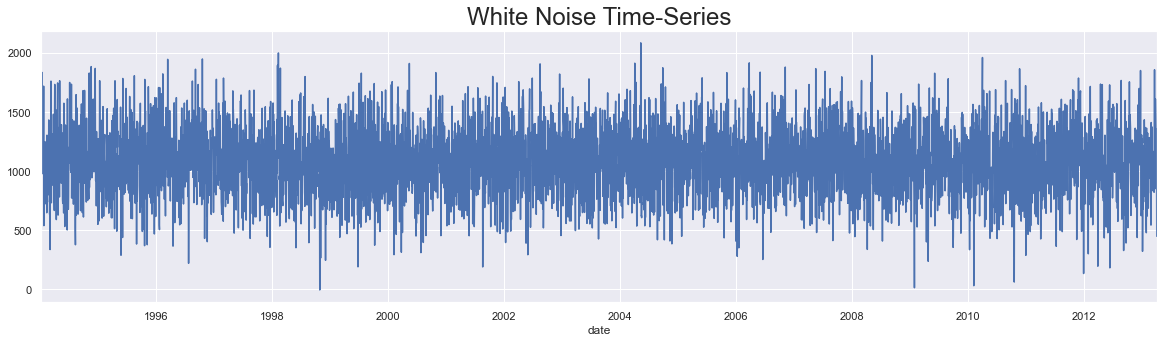

In [8]:
df.wn.plot(figsize=(20,5))
plt.title("White Noise Time-Series", size=24)
plt.show()

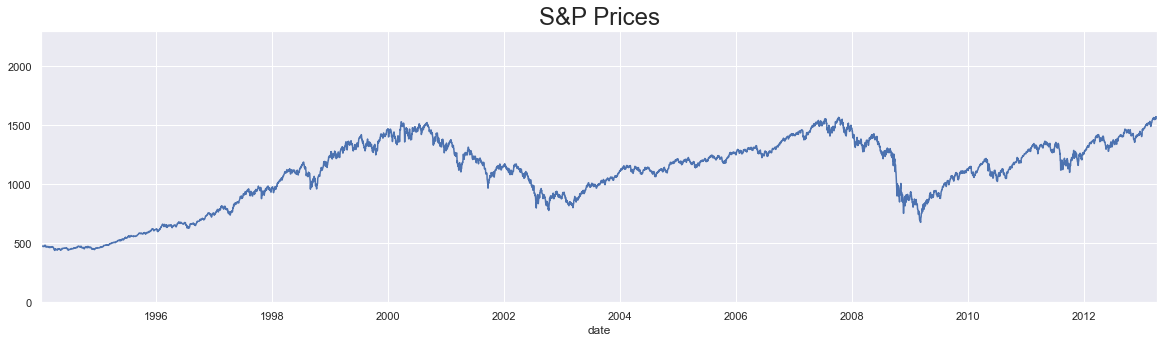

In [9]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size=24)
plt.ylim(0,2300)
plt.show()

- As we can visualize, white noise does not have any pattern, as compared to S&P Prices which has a distinct pattern

# Random Walk

- It is a special type of time series where values tend to persist (to continue to exist) over time and the differences between periods are simply white noise
- So because of this,
    - The best estimator for today's value is yesterday's value, and
    - The best estimator for tomorrow's value is today's value
- The formula for random walk is given as
    - P(t) = P(t-1) + e(t), where
        - P(t) = Price at period t
        - P(t-1) = Price at period t-1
        - e(t) = residual (Here e = epsilon)
            - e(t) here is considered as white noise as e(t) = WN(mean, variance)
        
    

In [10]:
# Inport data and format
rw = pd.read_csv("datasets\Section_5_Working_with_time_series_in_python\RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [11]:
# Summarise the data
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [12]:
# Add the random walk data to the main dataframe to compare results
df['rw'] = rw.price
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1230.131886,1122.139662
1994-01-10,475.27,1095.051863,1080.347860
1994-01-11,474.13,1409.938484,1082.095245
1994-01-12,474.17,1835.209873,1083.639265
1994-01-13,472.47,1596.440062,1067.146255


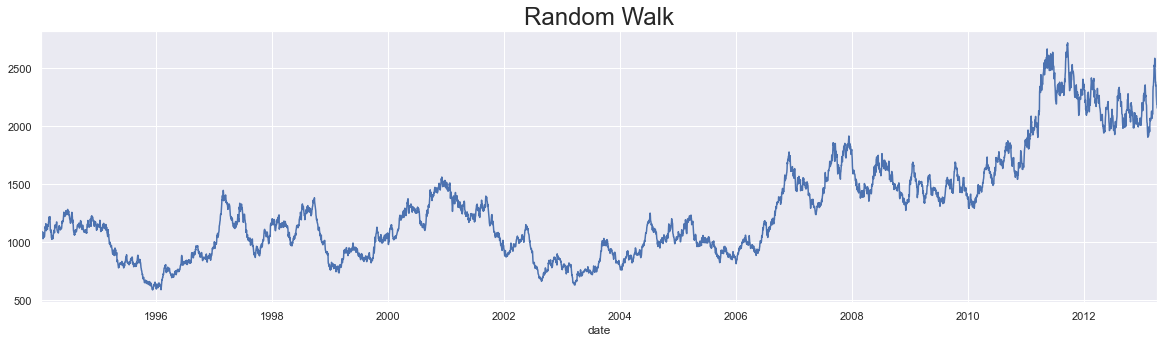

In [13]:
# Plot the random walk data to see how it varies over time
df.rw.plot(figsize=(20,5))
plt.title("Random Walk", size=24)
plt.show()

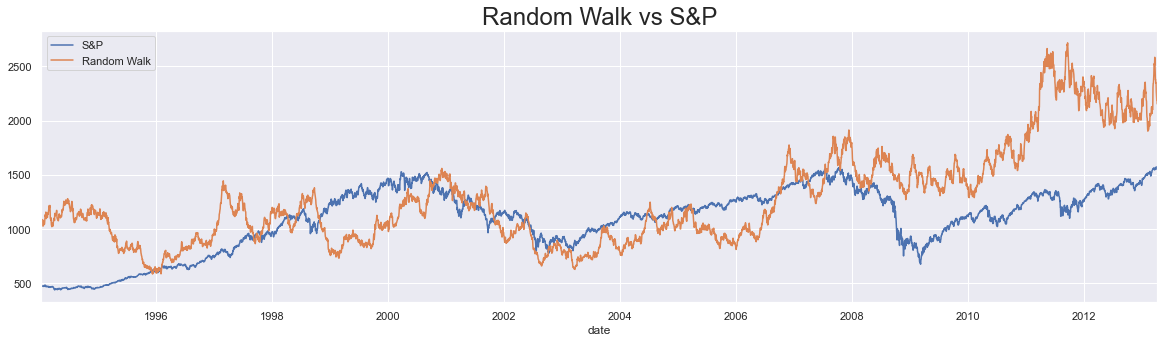

In [14]:
df.market_value.plot(figsize=(20,5), label = "S&P")
df.rw.plot(figsize=(20,5), label = "Random Walk")
plt.title("Random Walk vs S&P", size=24)
plt.legend()
plt.show()

- From the above graph, we observe
    - Both plots have Small variations between consequtive time periods
    - Cyclical increases and decreases in short periods of time

- But if a data is of type Random Walk, it is difficult in forecasting correct future values. 
- So we have a term called Market Efficiency, that is
    - It measures the level of difficulty in forecasting correct future values
- If future values (ex: Prices) can be predicted with great accuracy, we have Arbitrage opportunities
    - Arbitrage: Buy and sell commodities and make a safe profit while the price adjusts

# Stationarity

- In time series, stationarity means if we take consequtive samples of data (ex: S(t) and S(t+3)) with the same size should have identical covariance (ex: Cov(S(t)) = Cov(S(t+3))) 
- This is also known as **weak-form** stationarity or **covariance** stationarity

- Covariance stationarity assumptions
    - It should have Constant Mean
    - It should have Constant Variance
    - It should have consistent Covariance between sample periods at an identical distance from one another (ex: Cov(S(t),S(t+2)) = Cov(S(t+10),S(t+12)))

- Strict Stationarity
    - Here, the distributions of two samples from different time periods with same size should be equal
    - So for example, if we take a variable x, its distributions should match as following
        - (x(t),x(t+k)) = Dist(mean, variance) (ex: mean = 1 and variance = 1)
        - (x(t+z),x(t+k+z)) = Dist(mean, variance) (ex: mean = 1 and variance = 1)
    - In the above equations, for same sample size from different time periods, their distributions are same
    - But in real world, such situations are highly unlikely
    - So we usually use **covariance** stationarity

# Determining Weak Form Stationarity

- For a time series analysis, it is important to understand if the data we use for the analysis is a stationary or a non stationary dataset
- To check this, we have a test called **Dickey-Fuller** test, aka DF test (Created by David Dickey and Wayne Fuller)

- Dickey-Fuller test uses Null vs Alternate hypothesis test to check if the data is stationary or not
- The Null hypothesis (H0) of DF test states that the data is Non-Stationary
    - That is, one lag autocorrelation coefficient is < 1
- Where as the Alternate hypothesis (H1) states that the data is Stationary
    - That is, one lag autocorrelation coefficient is = 1
- So we compare and see if the **test statistic** is less than the **critical value**. If this is true, then the data is stationary
    - test statistic < critical value => Stationarity

- In python, we can use **adfuller()** method to get the above required values to compare result and make conclusions

In [15]:
# Getting output for test static and critical values
sts.adfuller(df.market_value)

(-1.7369847452352423,
 0.41216456967706283,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

- The above results can be read as
    - The first line is **test statistic** 
    - The second value is **p value** relaetd to the test statistic
    - The third line is **Number of lags** used in the regression when determining the test statistic
    - The fourth line is **Number of observations** used in the analysis
    - The values in the flower braces with 1%, 5% and 10% are the **critical values**
    - The last line is the **Maximised Information Criteria** provided there is some autocorrelation   

- We can understand it as follows
    - When we compare the test statistic to the critical values, we see that the test statistic is higher than all 3 critical values. Thus we do not find sufficient evidence for stationarity
    - The P Value says that there is a 40% chance of not rejecting null (If this is 5% or less, we can reject the null hypothesis)
    - The number of lags can be selected manually based on requirement
    - The Number of observations and number of lags add up to the size of the dataset
    - The Maximised Information Criteria must be lower to pridict the future values wiht greater accuracy

- We can run these tests on White Noise and Random Walk and observe the results

In [16]:
# White noise
sts.adfuller(df.wn)

(-70.4138926261933,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70600.69518416225)

- The test statistic and p value is very low as White Noise is a stationary data

In [17]:
# Random Walk
sts.adfuller(df.rw)

(-1.32860739276897,
 0.6159849181617392,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

- The random walk is not a stationary dataset
- From P value, we can say that there is a 61% chance of not rejecting the null hypothesis, which is quite high

# Seasonality

- If a data is seasonal, we will observe trends that appear on a cyclical basis
    - Ex: Seasons change throughout the year from Summer to Winter and repeat again

- To check if the data we have is seasonal, we can **Decompose** the dataset into 3 parts, namely
    - Trend = Pattern we observe in the dataset
    - Seasonal = Cyclical Effects in the dataset
    - Residual = Error of predictions or the difference between the actual data and the model we fit

- **Naive** Decomposition, one of the simplest Decomposition as two approaches
    - Additive Decomposition: At any point in time, the observed data is equal to the **sum** of trend, seasonal and residual
        - observed = trend + seasonal + residual
    - Multiplicative Decomposition: At any point in time, the observed data is equal to the **product** of trend, seasonal and residual
        - observed = trend * seasonal * residual

- We can use the method **seasonal_decompose()** in python to split the data into 3 parts

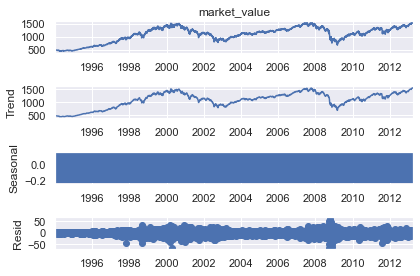

In [18]:
# Extracting the decomposed data = Additive method
s_dec_additive = seasonal_decompose(df.market_value, model="additive")
s_dec_additive.plot()
plt.show()

- In the above chart, the first plot is the observed data
- The trend closely resembles the observed data
    - This is because the decomposition method uses previous period values as a trend setter
- The seasonal plot is like a rectangle
    - This is because the data constantly oscillates up and down between -0.2 and 0.1
    - As the observed that the best predictor is the previous period values as trends follow the observed data closely and as data was similar to random walk, there is no concrete evidence of seasonality
    - If the data was seasonal, instead of taking previous period value, we will take data a bit more from behind (ex: 30 period gap)
- The residuals vary greatly in 2000 (around turn of the century) and 2008
    - This can be from the instabilities caused from Dotcom and Housing Prices bubbles respectively

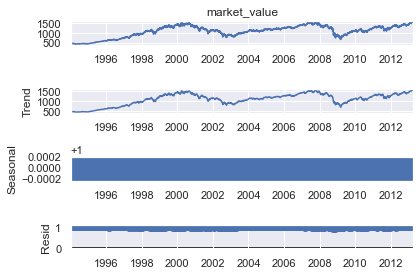

In [19]:
# Extracting the decomposed data = Multiplicative method
s_dec_additive = seasonal_decompose(df.market_value, model="multiplicative")
s_dec_additive.plot()
plt.show()

- The multiplicative decomposition also shows similar results as to the additive decomposition

# Correlation between past and present values

- Correlation: Measures the similarity in the change of values of two series
    - P(x,y) - where x and y and two different series

- But in time series we observe above, we only have one variable (x). So to check the correlation of the same variable, we have **Autocorrelation**

- **Autocorelation:** The correlation between a sequence and itself
    - It measures the resemblence between the actual data and the data several periods ago
    - Ex: x(t), x(t-1), x(t-2) vs x(t-1), x(t-2), x(t-3)
    - Such a series where we take data several periods ago is called lagged, because it is a delayed version of the original data
    - Ex: Comparing yesterday's weather to today's weather

# Autocorrelation Function (ACF)

- We can use the Autocorrelation function **plot_acf()** to plot the graph and see how correlated the data is with different lagged versions of itself

- The first argument is the time series data 
- Lags is used to look at how many lags we want to compare with our data
- zero is set to false as we dont want to compare the data with itself without lags (As answer will be = 1)

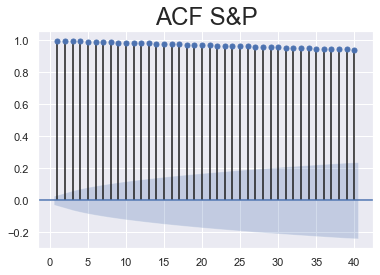

In [22]:
# Autocorrelation plot for S&P Market value
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.title("ACF S&P", size=24)
plt.show()

- The values on x axis are lags (they go upto the argument we set)
- The values on y axis are autocorrelation coefficient. It can go from -1 to 1
- The vertical lines we see are the autocorrelation coefficient for each lagged version of the data
- The blue area below around the x axis is called as significance
    - The significance of the autocorrelation value increases as we go from left to right
    - If the values are above the blue area, they are significant and have high auto correlation

- The autocorrelation barely diminishes as we go behind to previous time periods 
- This tells us that the previous month data is still good to predict this month's data

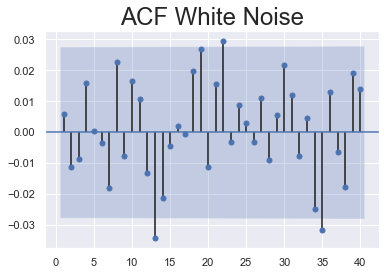

In [23]:
# Autocorrelation plot for White Noise
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.title("ACF White Noise", size=24)
plt.show()

- The values go positive and negative without any consistency
- This is expected as white noise do not have any autocorrelation

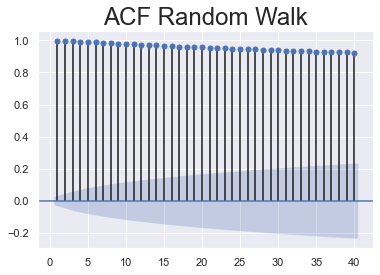

In [24]:
# Autocorrelation plot for Random Walk
sgt.plot_acf(df.rw, lags=40, zero=False)
plt.title("ACF Random Walk", size=24)
plt.show()

- The random walk results are similar to the S&P ACF plot
- It shows high autocorrelation with its previous time periods

# Partial Autocorrelation Function (PACF)

- While autocorrelation compares the relationship between present value and lagged values, it also adds up some indirect effects while comparing the relationship between the lags
    - Ex: The price of 2 days back is effected by the price 3 days back and so on. 
    - So if we directly take the 2 days back data, without removing the effects it has from the 3 days back data, it can give high autocorrelation results
    - To avoid this indirect effect, we need to remove the effect of previous lags on the data and check the correlation. 

- So to check the direct relationship without indirect effect from lags, we can use **Partial Autocorrelation Function**
- We can use the Partial Autocorrelation function **plot_pacf()** to plot the graph

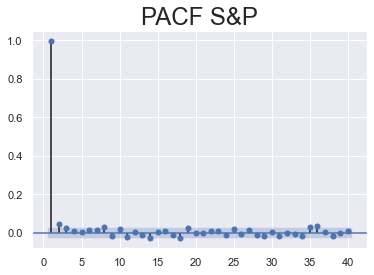

In [25]:
# Partial Autocorrelation plot for S&P Market value
sgt.plot_pacf(df.market_value, lags=40, zero=False)
plt.title("PACF S&P", size=24)
plt.show()

- Only first several lags show autocorrelation
- If we looki at 9th lag, the coefficient becomes negative. This is a lot different tan the autocorrelation plot we saw above where almost every value was above 1
- This drop we observe is because, the PACF function cancels out all additional channels a previous period value affects the resent value (Removing all indirect effects)

- PACF = Compares X(t-2) -> X(t), and 
    - Cancels out X(t-2) -> X(t-1) -> X(t)
- ACF = Compares X(t-2) -> X(t), and
    - Adds up X(t-2) -> X(t-1) -> X(t)

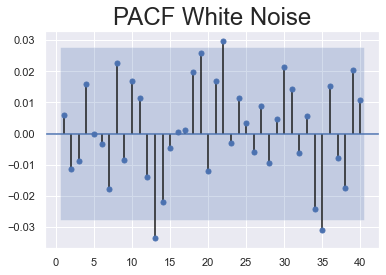

In [26]:
# Partial Autocorrelation plot for White Noise
sgt.plot_pacf(df.wn, lags=40, zero=False)
plt.title("PACF White Noise", size=24)
plt.show()

- The white noise shouws no autocorrelation
- Some values go above blue area, but they are random

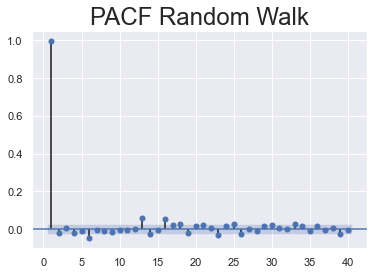

In [27]:
# Partial Autocorrelation plot for Random Walk
sgt.plot_pacf(df.rw, lags=40, zero=False)
plt.title("PACF Random Walk", size=24)
plt.show()

- The random walk does not show a significant auto correlation with other lag values except the first lag value
- This is expected as the previous period value is the best predictor for the current value in random walk